In [1]:
#Импортируем необходимые модули. В данном случае, модуль KMeans для кластеризации методом K-средних и модуль TfidfVectorizer для векторизации текстовых данных.
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
df = pd.read_excel('Выгрузка.xlsx')
df.head()

In [3]:
df.mark_6.isna().sum()

0

Опитмальное кол-во кластеров

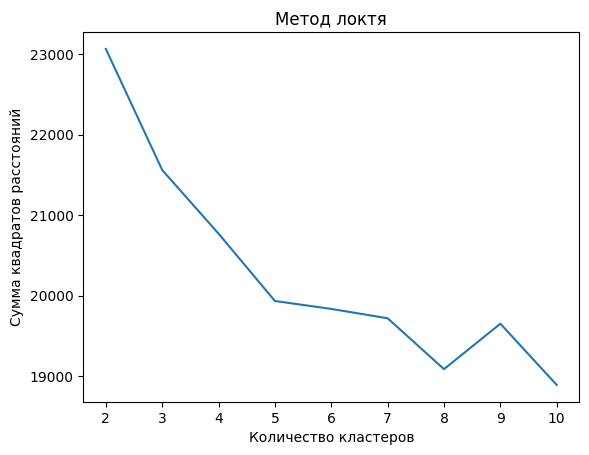

In [4]:
# Список комментариев из столбца 'mark_6' в датафрейме df
comments = df['mark_6'].to_list()
# Векторизуем комментарии, преобразуя их в числовые признаки
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)

# Оцениваем сумму квадратов расстояний до центроидов для различных значений k
inertias = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Выводим график зависимости суммы квадратов расстояний от количества кластеров
plt.plot(range(2, 11), inertias)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()



In [ ]:
#Получаем список комментариев из столбца 'mark_6' в датафрейме df с помощью метода to_list(). Этот список комментариев будет использован для кластеризации.
# Получаем комментарии из столбца mark_6 датафрейма df
#comments = df['mark_6'].to_list() #Удаляем пустые, если нужно dropna()

#Создаем объект векторизации TfidfVectorizer(), который будет использоваться для преобразования текстовых комментариев в числовой формат.
# Векторизуем комментарии, преобразуя их в числовые признаки
#vectorizer = TfidfVectorizer()
#Применяем метод .fit_transform() векторизатора к списку комментариев. Этот шаг преобразует текст комментариев в набор числовых признаков, которые можно использовать для кластеризации методом K-средних.
#X = vectorizer.fit_transform(comments)
#Задаем количество кластеров, на которые будут разбиты данные. В данном случае, мы устанавливаем количество кластеров равным 3.
# Задаем количество кластеров
n_clusters = 5
#Создаем объект kmeans класса KMeans для кластеризации методом K-средних, используя заданное количество кластеров.
#Вызываем метод .fit() объекта kmeans, передав ему матрицу X, которая была получена в результате векторизации комментариев. Эти два шага используются для обучения модели кластеризации методом K-средних.
# Применяем алгоритм кластеризации K-средних
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
#Вызываем метод .predict() объекта kmeans, передав ему матрицу X, чтобы получить метки кластеров для каждого комментария.
#Создаем новый столбец 'clusters' в датафрейме df и заполняем его метками кластеров, используя метод pd.Series() со списком меток кластеров cluster_labels.
# Получаем метки кластеров для каждого комментария
cluster_labels = kmeans.predict(X)
# Добавляем столбец с метками кластеров в датафрейм
df['clusters'] = pd.Series(cluster_labels)
#Итерируем по количеству кластеров, выведя каждый кластер и соответствующие комментарии. Мы используем фильтрацию чтобы выбрать только те комментарии, которые относятся к кластеру, который мы вывели в текущей итерации. Каждый кластер и список комментариев выводится в консоль.
# Выводим результаты кластеризации
for i in range(n_clusters):
    print('Кластер', i+1)
    cluster_comments = df[df['clusters'] == i]['mark_6']
    print(cluster_comments.to_list())

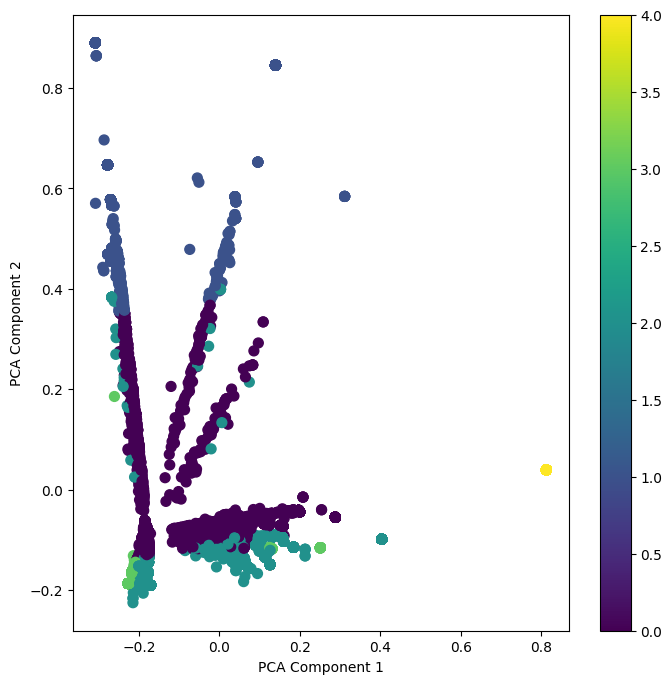

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Применяем метод PCA для снижения размерности исходных данных до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Выводим график парных компонент, раскрашенный в соответствии с метками кластеров
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [8]:
df.to_excel('TEST_result_clast.xlsx')

In [ ]:
# Оцениваем качество кластеризации с помощью метрики silhouette
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Выводим график зависимости метрики silhouette от количества кластеров
plt.plot(range(2, 11), silhouette_scores)
plt.title('Метрика silhouette')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение метрики')
plt.show()